In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/ABLN777/Data\mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

### Preprocessing the data
1. Encoding the categorical variables.
2. Finding correlations between target features
3. Checking for outliers using boxplot

### Encoding the categorical variables for the Algorithm

In [4]:
#Label encoder to convert the dataset
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])
    

In [5]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [6]:
# using onehot encoding to encode categorical variables
df_one_hot = pd.concat([df.iloc[:,0] , pd.get_dummies(df.iloc[:,1:23])] , axis = 1)
df_one_hot.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [7]:
features = df_one_hot.iloc[:, 1:118]
label = df_one_hot.iloc[:,0]
label = le.fit_transform(label)

In [9]:
# scale the features so no one  feature seems more important than the others 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xt = scaler.fit_transform(features)

One hot encoding significantly increases the dimensionality( many correlated features) thus we reduce this dimensionality 
through Principal component analysis (PCA)

### Principle Component Analysis for reducing Dimension of the data
Principal component analysis (PCA) is a dimension reduction technique that takes a data set characterized by a set of possibly correlated features and generates a new set of features that are uncorrelated. It is used as a dimension reduction technique because the new set of uncorrelated features are chosen to be efficient in terms of capturing the variance in the data set.

In [10]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized' , random_state=100, n_components = 2)
pca_model = pca.fit_transform(Xt)

In [11]:
print(pca_model)

[[-0.57432076 -0.97579004]
 [-2.28210445  0.2790814 ]
 [-1.85803669 -0.27096485]
 ...
 [-1.6215172  -0.75753108]
 [ 3.67060517 -1.03277158]
 [-1.57520297 -1.22857814]]


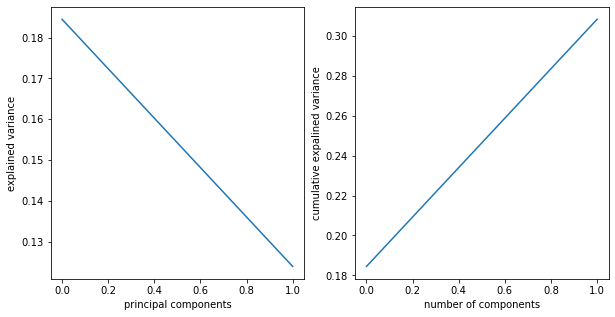

In [84]:
fig = plt.figure(figsize= (10,5))
ax = plt.subplot(121)
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('principal components')
plt.ylabel('explained variance')

ax2 = plt.subplot(122)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative expalined variance')

plt.show()

From the plots, much of the variance(90%) is explained by approx 7 components. Note: Implement `hopkin's statistics` to fin out how clusterable the data actually is.

#### We use elbow and silhouette to find an optimum number of clusters

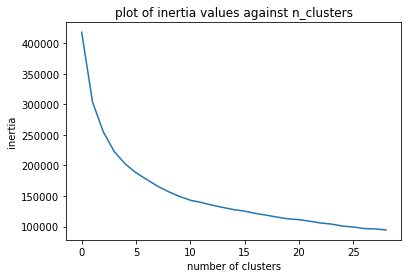

<Figure size 720x360 with 0 Axes>

In [12]:
from sklearn.cluster import KMeans
def plot_inertia(df):
    inertia = []
    for n in range(1,30):
        model_kmeans = KMeans(n_clusters =n, max_iter=100, random_state=12)
        model_kmeans.fit(df)
        inertia.append(model_kmeans.inertia_)
    plt.plot(inertia)
    plt.xlabel('number of clusters')
    plt.ylabel('inertia')
    plt.title('plot of inertia values against n_clusters')
    plt.figure(figsize= (10,5))
plot_inertia(df)
        

In [31]:
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_samples, silhouette_score

# def sil_score(df):
#     silho_score = []
#     for k in range (1,30):
#         model2_kmeans = KMeans(n_clusters = k , random_state=12)
#         model2_kmeans.fit(df)
#         silho_score.append([k, silhouette_score(df, model2_kmeans.labels_)])
#     plt.plot(pd.DataFrame(silho_score)[0], pd.DataFrame(silho_score)[1])
    
# sil_score(df)

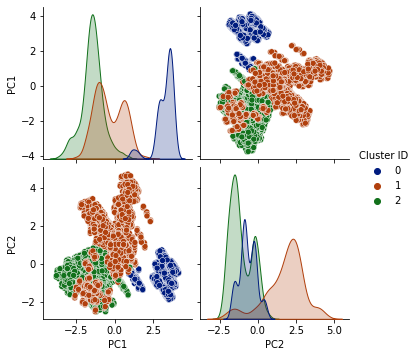

In [15]:
kmeans_mod1 = KMeans(n_clusters = 3, max_iter=50, random_state = 93)
kmeans_mod1.fit(Xt)
dummy_df = pd.DataFrame(Xt)
# df with all the features
kmeans_mod1_df = pd.concat([dummy_df , pd.Series(kmeans_mod1.labels_)], axis = 1)
kmeans_mod1_df.rename(columns = {0:'Cluster ID'}, inplace= True)
dummy_df2 = pd.DataFrame.copy(pd.DataFrame(pca_model))

# df with reduced features using PCA
pca_df = pd.concat([dummy_df2 , pd.Series(kmeans_mod1.labels_)], axis=1)
pca_df.columns = ['PC1' , 'PC2', 'Cluster ID']
sns.pairplot(data = pca_df , vars=['PC1', 'PC2'] ,palette = 'dark', hue = 'Cluster ID')

In [ ]:
kmeans_mod1_df.head()

### Model analysis and validation.
Techniques used include;
1. **K-fold cross validation**:It is method to resample limited data sample which will help to evaluate machine learning models. This method has a parameter as ‘K’ that can be considered as number of groups in which 80:20 ratio is taken for training and testing respectively and this repeats with different group.

2. **Precision and Recall**: It is always wise to check for true +ve ratio with respect to all positive (TP/(TP + FP)) also called as precision value.
Recall can be said as the percentage of total relevant results correctly classified by the algorithm (TP/(TP+FN)).
3. **F1 Score**: One always look forward to have model with highest precision and recall. But when it is not possible to decide, then we must go for F1 score which is the harmonic of precision and recall. (2*Precision*Recall/(Precision+Recall))

4. **ROC:** The Receiver Operating Curve (ROC) is plotted with TPR (True positive rate) against the FPR (False Positive Rate) where TPR is on y-axis and FPR is on the x-axis.


### classification Algorithms to use:
1. Gaussian Naive Bayes classifier.
2. Logistic Regression classifier
3. Decision Tree Classifier
4. Random Forest Classifier
5. XGBoost Classifier
6. Linear Discriminant Classifier
7. Gaussian Process Classifier
8. Ada-Boost Classifier

In [16]:
from sklearn.model_selection import train_test_split
X, y = Xt, label
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2)

In [17]:
#import the different classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc, classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [20]:
#initialize an empty list to store the different classifier objects
classifiers = []
# naive bayes
nb_model = GaussianNB()
classifiers.append(("Gaussian Naive Bayes Classifier",nb_model))
# logistic: requires some tuning and scaling data to perform well
# lr_model= LogisticRegression(max_iter=100) 
# classifiers.append(("Logistic Regression Classifier",lr_model))
# Decision tree
dt_model = DecisionTreeClassifier()
classifiers.append(("Decision Tree Classifier",dt_model))
# Random Forest
rf_model = RandomForestClassifier()
classifiers.append(("Random Forest Classifier",rf_model))
# gradient boost
gboost_model = GradientBoostingClassifier()
classifiers.append(("XG Boost Classifier",gboost_model))
# Linear Discriminant
lda_model = LinearDiscriminantAnalysis()
classifiers.append(("Linear Discriminant Analysis", lda_model))
# Gaussian process
gp_model =  GaussianProcessClassifier()
classifiers.append(("Gaussian Process Classifier", gp_model))
# Ada boost
ab_model =  AdaBoostClassifier()
classifiers.append(("AdaBoost Classifier", ab_model))


In [21]:
# store all the scores
cv_scores = []
names = []
for name, clf in classifiers:
    print(name)
    clf.fit(X_train , y_train)
    y_prob = clf.predict_proba(X_test)[:,1] # positive class probabilities
    y_pred = np.where(y_prob > 0.5, 1, 0) # threshold of division of the class
    print("Model score: ", clf.score(X_test,y_pred))
    print("Number of misclassified points from %d points : %d" % (X_test.shape[0] ,(y_test!= y_pred).sum()))
    scores = cross_val_score(clf, features, label, cv = 10, scoring = 'accuracy')
    cv_scores.append(scores)
    names.append(name)
    print("Cross validation scores : ", scores.mean())
    confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
    print("Confusion Matrix \n",confusion_matrix)
    classification_report = metrics.classification_report(y_test,y_pred)
    print("Classification Report \n",classification_report)

Gaussian Naive Bayes Classifier
Model score:  1.0
Number of misclassified points from 1625 points : 139
Cross validation scores :  0.8463860057319785
Confusion Matrix 
 [[739  83]
 [ 56 747]]
Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.90      0.91       822
           1       0.90      0.93      0.91       803

    accuracy                           0.91      1625
   macro avg       0.91      0.91      0.91      1625
weighted avg       0.91      0.91      0.91      1625

Logistic Regression Classifier
Model score:  1.0
Number of misclassified points from 1625 points : 72


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Cross validation scores :  0.8797426668847969
Confusion Matrix 
 [[785  37]
 [ 35 768]]
Classification Report 
               precision    recall  f1-score   support

           0       0.96      0.95      0.96       822
           1       0.95      0.96      0.96       803

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625

Decision Tree Classifier
Model score:  1.0
Number of misclassified points from 1625 points : 0
Cross validation scores :  0.9611225225552747
Confusion Matrix 
 [[822   0]
 [  0 803]]
Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       822
           1       1.00      1.00      1.00       803

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Random Forest Classifier
Mo

On the whole, The worst performing algorithms are; Gaussian Naive Bayes Classifier,
Logistic regression and Linear Discriminant Analysis